In [1]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
from plotnine import *

In [2]:
df = pd.read_csv('/Users/blancaz/Desktop/atimelogger_report_sleep_202209_202302.csv')

In [3]:
df.head()

,start_time,end_time,duration
0,"10月 02, 2022 01:46","10月 02, 2022 10:45",8h 58m 47s
1,"10月 03, 2022 02:30","10月 03, 2022 09:43",7h 12m 38s
2,"10月 04, 2022 03:01","10月 04, 2022 10:47",7h 45m 53s
3,"10月 05, 2022 02:57","10月 05, 2022 11:15",8h 17m 55s
4,"10月 06, 2022 03:59","10月 06, 2022 11:56",7h 56m 41s


In [4]:
df.dtypes

start_time    object
end_time      object
duration      object
dtype: object

In [5]:
# replace '月' and ', ' with '-'
df['start_time'] = df['start_time'].str.replace('月','-')
df['start_time'] = df['start_time'].str.replace(',','-')
df['end_time'] = df['end_time'].str.replace('月','-')
df['end_time'] = df['end_time'].str.replace(',','-')
df

,start_time,end_time,duration
0,10- 02- 2022 01:46,10- 02- 2022 10:45,8h 58m 47s
1,10- 03- 2022 02:30,10- 03- 2022 09:43,7h 12m 38s
2,10- 04- 2022 03:01,10- 04- 2022 10:47,7h 45m 53s
3,10- 05- 2022 02:57,10- 05- 2022 11:15,8h 17m 55s
4,10- 06- 2022 03:59,10- 06- 2022 11:56,7h 56m 41s
...,...,...,...
199,9- 27- 2022 10:08,9- 27- 2022 12:04,1h 56m 28s
200,9- 28- 2022 01:20,9- 28- 2022 11:09,9h 49m 45s
201,9- 29- 2022 03:10,9- 29- 2022 11:09,7h 58m 47s
202,9- 30- 2022 01:28,9- 30- 2022 09:58,8h 30m 37s


In [6]:
df['start_datetime'] = pd.to_datetime(df['start_time'])
df['end_datetime'] = pd.to_datetime(df['end_time'])
df['start_time'] = df['start_datetime'].dt.time
df['end_time'] = df['end_datetime'].dt.time
df['start_date'] = df['start_datetime'].dt.date
df

,start_time,end_time,duration,start_datetime,end_datetime,start_date
0,01:46:00,10:45:00,8h 58m 47s,2022-10-02 01:46:00,2022-10-02 10:45:00,2022-10-02
1,02:30:00,09:43:00,7h 12m 38s,2022-10-03 02:30:00,2022-10-03 09:43:00,2022-10-03
2,03:01:00,10:47:00,7h 45m 53s,2022-10-04 03:01:00,2022-10-04 10:47:00,2022-10-04
3,02:57:00,11:15:00,8h 17m 55s,2022-10-05 02:57:00,2022-10-05 11:15:00,2022-10-05
4,03:59:00,11:56:00,7h 56m 41s,2022-10-06 03:59:00,2022-10-06 11:56:00,2022-10-06
...,...,...,...,...,...,...
199,10:08:00,12:04:00,1h 56m 28s,2022-09-27 10:08:00,2022-09-27 12:04:00,2022-09-27
200,01:20:00,11:09:00,9h 49m 45s,2022-09-28 01:20:00,2022-09-28 11:09:00,2022-09-28
201,03:10:00,11:09:00,7h 58m 47s,2022-09-29 03:10:00,2022-09-29 11:09:00,2022-09-29
202,01:28:00,09:58:00,8h 30m 37s,2022-09-30 01:28:00,2022-09-30 09:58:00,2022-09-30


In [7]:
# deal with sessions that cross day boundaries
df_no_cross = df[df['start_datetime'].dt.day == df['end_datetime'].dt.day].copy()

df_cross = df[df['start_datetime'].dt.day != df['end_datetime'].dt.day] 
df_cross_before_midnight = df_cross.copy()
df_cross_after_midnight = df_cross.copy()

df_cross_before_midnight['end_time'] = datetime.time(hour=23, minute=59, second=59)
df_cross_after_midnight['start_date'] = df_cross_after_midnight['start_date'] + datetime.timedelta(days=1)
df_cross_after_midnight['start_time'] = datetime.time(hour=0, minute=0, second=0)

In [8]:
# combine dataframes
rows_no_cross = df_no_cross[['start_date','start_time','end_time']]
rows_cross_before_midnight = df_cross_before_midnight[['start_date','start_time','end_time']]
rows_cross_after_midnight = df_cross_after_midnight[['start_date','start_time','end_time']]
rows = pd.concat([rows_no_cross, rows_cross_before_midnight, rows_cross_after_midnight])
rows

,start_date,start_time,end_time
0,2022-10-02,01:46:00,10:45:00
1,2022-10-03,02:30:00,09:43:00
2,2022-10-04,03:01:00,10:47:00
3,2022-10-05,02:57:00,11:15:00
4,2022-10-06,03:59:00,11:56:00
...,...,...,...
163,2023-02-26,00:00:00,08:59:00
167,2023-03-01,00:00:00,07:16:00
194,2022-09-24,00:00:00,06:02:00
195,2022-09-25,00:00:00,00:20:00


In [9]:
# convert to pandas datetime to make plotting easier
rows['start_time'] = pd.to_datetime(rows['start_time'], format='%H:%M:%S')
rows['end_time'] = pd.to_datetime(rows['end_time'], format='%H:%M:%S')

In [10]:
plot = (ggplot(rows, aes(x='start_date'))
  + geom_linerange(aes(ymin = 'start_time', ymax = 'end_time'))
  + scale_x_date(name='', date_labels='%b')
        # scale_x_date --> https://ggplot2.tidyverse.org/reference/scale_date.html
        # %b --> https://rdrr.io/r/base/strptime.html
  + scale_y_datetime(date_labels='%H:%M')
  + ggtitle('Sleep Times From 2022/09 To 2023/02')
  + theme_minimal() 
)


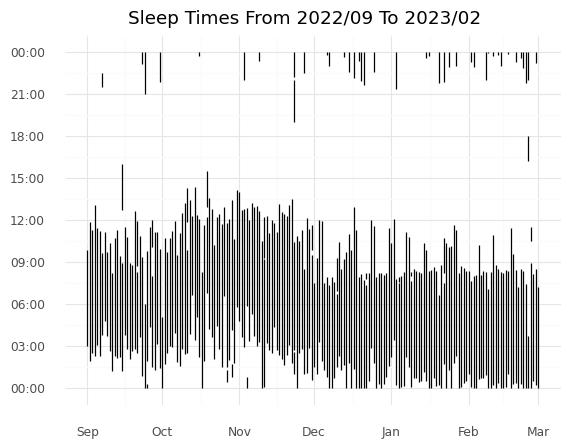

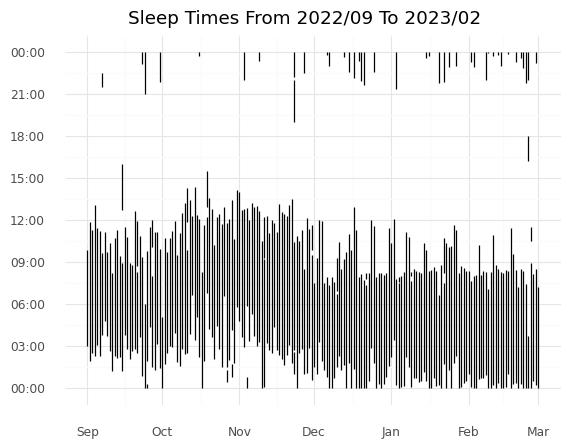

In [11]:
plot.draw()